постараемся избавиться от Мультиколлинеарности и нормализуем данные 

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [2]:
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target
print(X.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

постараемся избавиться от Мультиколлинеарности и нормализуем данные 

In [5]:
X_train = X_train.drop(['AveBedrms'], axis=1)
X_test = X_test.drop(['AveBedrms'], axis=1)
X_train.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,874.0,2.300000,36.78,-119.80


In [6]:
X_train_norm = scaler.fit_transform(X_train)
X_train.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,874.0,2.300000,36.78,-119.80


In [7]:
# Создаем полиномиальные признаки (например, степени 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [8]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=100.0)  # alpha — параметр регуляризации
model.fit(X_train_poly, y_train)
# Прогнозируем на тестовых данных
y_pred = model.predict(X_test_poly)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Ridge Regression:')
print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')

Ridge Regression:
MSE: 0.48
R^2: 0.64


c:\Users\erik0\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.89942e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [9]:
print(y_pred)

[0.48520002 1.65820744 3.04540899 ... 4.26942472 1.15877932 1.83259731]


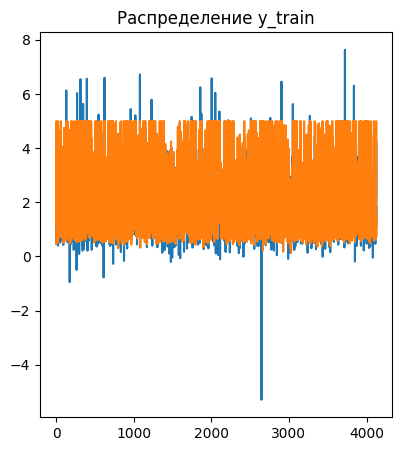

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(y_pred)), y_pred)
plt.plot(np.arange(len(y_pred)), y_test)
plt.title('Распределение y_train')

plt.show()